In [ ]:
import keras

In [ ]:
from keras_preprocessing.image import ImageDataGenerator
train_data = ImageDataGenerator()
val_data = ImageDataGenerator()


In [ ]:
train_data = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN/TRANSFER LEARNING/train', target_size = (227,227), class_mode='binary')
val_data = val_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN/TRANSFER LEARNING/val', target_size = (227,227), class_mode='binary')

Found 199 images belonging to 2 classes.
Found 56 images belonging to 2 classes.


In [ ]:
import keras
from keras import Sequential
from keras.layers import Dense,Dropout,MaxPooling2D,Conv2D,Flatten


In [ ]:
from keras.layers.normalization import BatchNormalization
from keras.engine import input_layer

# 1st Conv layer
model = Sequential()
model.add(Conv2D(input_shape = (227,227,3), kernel_size = (11,11), filters= 96, strides=4, activation= 'relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides = 2, padding = 'same'))
model.add(BatchNormalization())

# 2nd Conv Layer

model.add(Conv2D(kernel_size = (5,5), filters = 256,strides = 1, padding = 'same' , activation = 'relu'))
model.add(MaxPooling2D(pool_size = (3,3), strides = 2 ))
model.add(BatchNormalization())

# 3rd Conv Layer

model.add(Conv2D(filters = 384, kernel_size = (3,3), strides = 1, activation = 'relu', padding = 'same'))
model.add(BatchNormalization())

# 4 th Conv Layer

model.add(Conv2D(filters = 384, kernel_size = (3,3), strides = 1, activation = 'relu', padding = 'same'))
model.add(BatchNormalization())

# 5 th conv layer

model.add(Conv2D(filters = 256, kernel_size = (3,3), strides = 1, activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2)))

model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 28, 28, 96)        0         
_________________________________________________________________
batch_normalization_30 (Batc (None, 28, 28, 96)        384       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 256)       614656    
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 13, 13, 256)       1024      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 13, 13, 384)     

In [ ]:
from keras.layers.core import Activation
model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 28, 28, 96)        0         
_________________________________________________________________
batch_normalization_30 (Batc (None, 28, 28, 96)        384       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 256)       614656    
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 13, 13, 256)       1024      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 13, 13, 384)     

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit_generator(train_data, steps_per_epoch=20, epochs = 10)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
20/20 [==============================] - 74s 4s/step - loss: 30.7955 - accuracy: 0.5037
Epoch 2/10
20/20 [==============================] - 68s 3s/step - loss: 4.7979 - accuracy: 0.5572
Epoch 3/10
20/20 [==============================] - 68s 3s/step - loss: 4.7667 - accuracy: 0.6357
Epoch 4/10
20/20 [==============================] - 68s 3s/step - loss: 1.9876 - accuracy: 0.7240
Epoch 5/10
20/20 [==============================] - 67s 3s/step - loss: 1.7645 - accuracy: 0.7832
Epoch 6/10
20/20 [==============================] - 68s 3s/step - loss: 1.4861 - accuracy: 0.8005
Epoch 7/10
20/20 [==============================] - 67s 3s/step - loss: 0.7694 - accuracy: 0.8190
Epoch 8/10
20/20 [==============================] - 70s 3s/step - loss: 0.8475 - accuracy: 0.8349
Epoch 9/10
20/20 [==============================] - 68s 4s/step - loss: 1.7994 - accuracy: 0.7968
Epoch 10/10
20/20 [==============================] - 67s 3s/step - loss: 0.6956 - accuracy: 0.8297


In [ ]:
import os
path = '/content/drive/MyDrive/Colab Notebooks/CNN/TRANSFER LEARNING/test'
file_path = []
for root,dictionary,files in os.walk(path):
  for file in files:
    file_path.append(os.path.join(root, file))

In [ ]:
file_path

['/content/drive/MyDrive/Colab Notebooks/CNN/TRANSFER LEARNING/test/1.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/TRANSFER LEARNING/test/11.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/TRANSFER LEARNING/test/10.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/TRANSFER LEARNING/test/12.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/TRANSFER LEARNING/test/13.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/TRANSFER LEARNING/test/29.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/TRANSFER LEARNING/test/24.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/TRANSFER LEARNING/test/2.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/TRANSFER LEARNING/test/14.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/TRANSFER LEARNING/test/28.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/TRANSFER LEARNING/test/16.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/TRANSFER LEARNING/test/17.jpg',
 '/content/drive/MyDrive/Colab Notebooks/CNN/TRANSFER LEARNING/test/26.jpg',
 

In [ ]:
train_data.class_indices

{'improper': 0, 'proper': 1}

In [ ]:
from keras.preprocessing import image
def testing_image(image_dictionary):
  test_image = image.load_img(image_dictionary, target_size = (227,227))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  result = model.predict(test_image)
  print(result)
  if result[0][0] >  0.5:
    return 'proper'
  else:
    return 'improper'

In [ ]:
result = []
for i in file_path:
  result.append(testing_image(i))

[[1.953538e-10]]
[[1.]]
[[0.9998834]]
[[1.]]
[[0.11337471]]
[[0.03126591]]
[[0.00929663]]
[[1.]]
[[0.24964848]]
[[1.]]
[[1.]]
[[1.]]
[[0.00025654]]
[[0.01520023]]
[[0.00026202]]
[[0.999889]]
[[1.]]
[[1.]]
[[1.]]
[[0.99898773]]
[[1.]]
[[1.]]
[[1.]]
[[0.6685238]]
[[1.]]
[[1.]]
[[1.]]
[[0.9944899]]
[[0.6423494]]


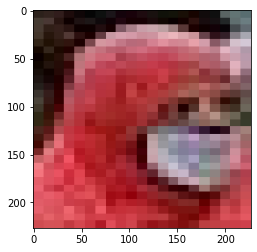

improper


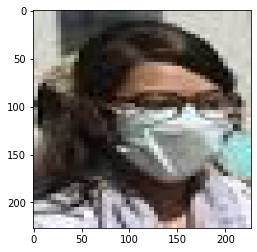

proper


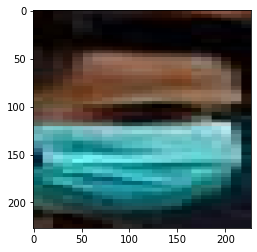

proper


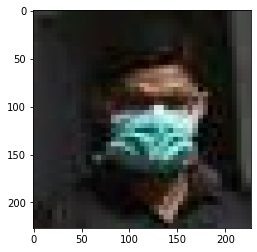

proper


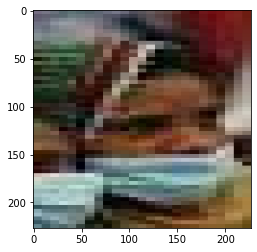

improper


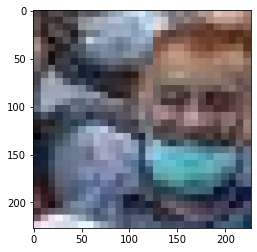

improper


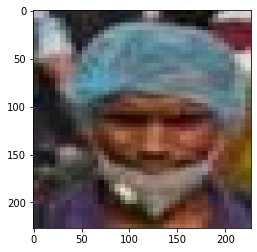

improper


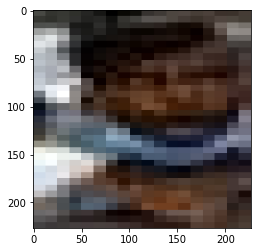

proper


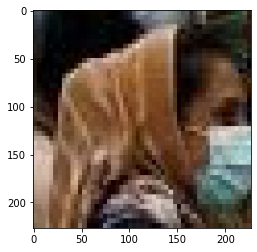

improper


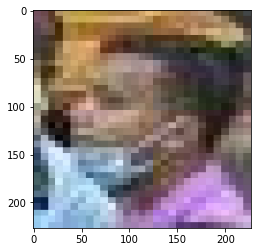

proper


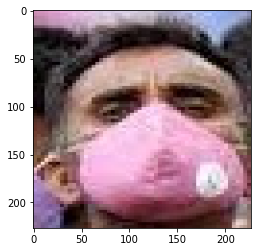

proper


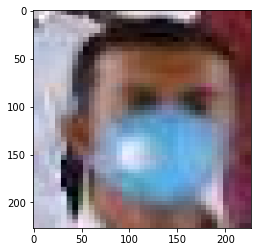

proper


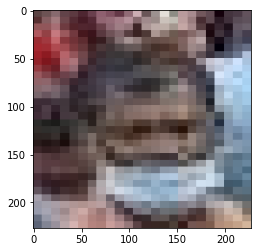

improper


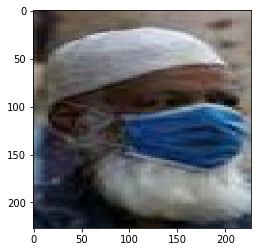

improper


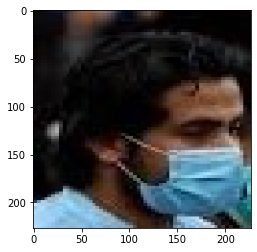

improper


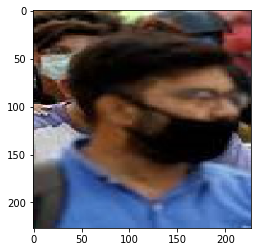

proper


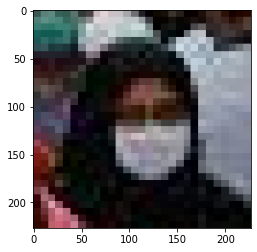

proper


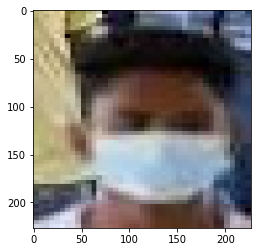

proper


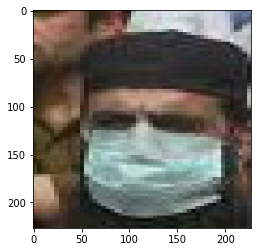

proper


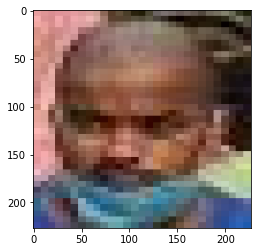

proper


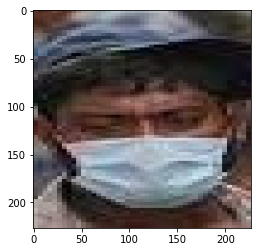

proper


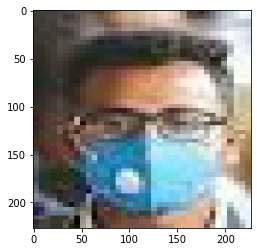

proper


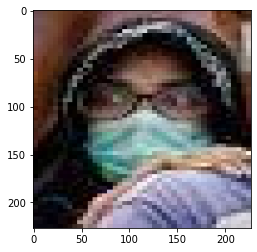

proper


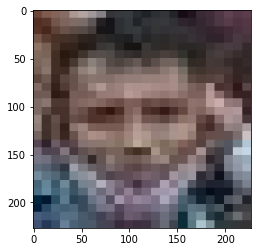

proper


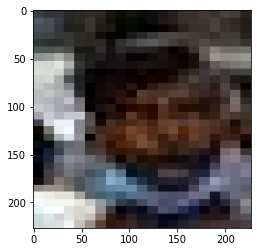

proper


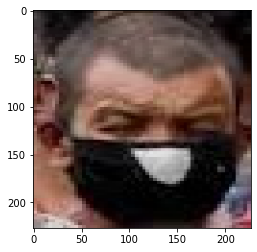

proper


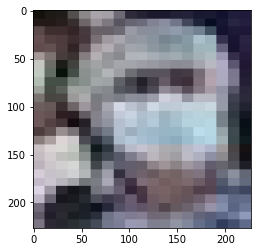

proper


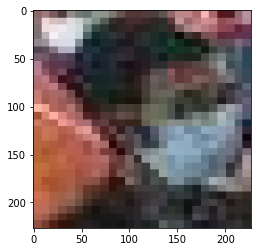

proper


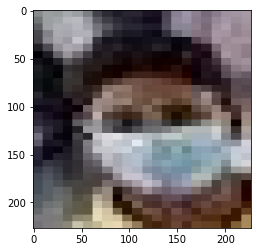

proper


In [ ]:
from matplotlib import pyplot
for i,j in zip(file_path, result):
  new_image = image.load_img(i, target_size = (227,227))
  pyplot.imshow(new_image)
  pyplot.show()
  print(j)
